# Material parameters

Felix Fritzen <fritzen@simtech.uni-stuttgart.de>,
Julius Herb <julius.herb@mib.uni-stuttgart.de>,
Shadi Sharba <shadi.sharba@isc.fraunhofer.de>

University of Stuttgart, Institute of Applied Mechanics, Chair for Data Analytics in Engineering

> **Funding acknowledgment**
> The IGF-Project no.: 21.079 N / DVS-No.: 06.3341 of the
> “Forschungsvereinigung Schweißen und verwandte Verfahren e.V.” of the
> German Welding Society (DVS), Aachener Str. 172, 40223 Düsseldorf, Germany,
> was funded by the Federal Ministry for Economic Affairs and Climate Action (BMWK)
> via the German Federation of Industrial Research Associations (AiF) in accordance
> with the policy to support the Industrial Collective Research (IGF)
> on the orders of the German Bundestag.
>
> Felix Fritzen is funded by the German Research Foundation (DFG) --
> 390740016 (EXC-2075); 406068690 (FR2702/8-1); 517847245 (FR2702/10-1).

## Imports

In [ ]:
from typing import Tuple, Union

import numpy as np

## Temperature range

In [2]:
min_temperature = 293.00
max_temperature = 1300.00

## Basic tensors

In [3]:
I2 = np.asarray([1.0, 1.0, 1.0, 0.0, 0.0, 0.0])
I4 = np.eye(6)
IxI = np.outer(I2, I2)
P1 = IxI / 3.0
P2 = I4 - P1

## Temperature-dependent material parameters of copper phase (phase no. 0)

In [4]:
poisson_ratio_cu = lambda x: 3.40000e-01 * x**0
conductivity_cu = lambda x: 4.20749e05 * x**0 + -6.84915e01 * x**1
heat_capacity_cu = (
    lambda x: 2.94929e03 * x**0
    + 2.30217e00 * x**1
    + -2.95302e-03 * x**2
    + 1.47057e-06 * x**3
)
cte_cu = lambda x: 1.28170e-05 * x**0 + 8.23091e-09 * x**1
eps_th_cu = lambda x: 1.28170e-05 * (x - min_temperature) + 8.23091e-09 * 0.5 * (
    x * x - min_temperature**2
)
elastic_modulus_cu = (
    lambda x: 1.35742e08 * x**0 + 5.85757e03 * x**1 + -8.16134e01 * x**2
)
hardening_cu = lambda x: 20e06 * x**0

shear_modulus_cu = lambda x: elastic_modulus_cu(x) / (2.0 * (1.0 + poisson_ratio_cu(x)))
bulk_modulus_cu = lambda x: elastic_modulus_cu(x) / (
    3.0 * (1.0 - 2.0 * poisson_ratio_cu(x))
)
stiffness_cu = lambda x: bulk_modulus_cu(x) * IxI + 2.0 * shear_modulus_cu(x) * P2

## Temperature-dependent material parameters of wsc phase (phase no. 1)

In [5]:
poisson_ratio_wsc = lambda x: 2.80000e-01 * x**0
conductivity_wsc = (
    lambda x: 2.19308e05 * x**0
    + -1.87425e02 * x**1
    + 1.05157e-01 * x**2
    + -2.01180e-05 * x**3
)
heat_capacity_wsc = (
    lambda x: 2.39247e03 * x**0
    + 6.62775e-01 * x**1
    + -2.80323e-04 * x**2
    + 6.39511e-08 * x**3
)
cte_wsc = lambda x: 5.07893e-06 * x**0 + 5.67524e-10 * x**1
eps_th_wsc = lambda x: 5.07893e-06 * (x - min_temperature) + 5.67524e-10 * 0.5 * (
    x * x - min_temperature**2
)
elastic_modulus_wsc = (
    lambda x: 4.13295e08 * x**0
    + -7.83159e03 * x**1
    + -3.65909e01 * x**2
    + 5.48782e-03 * x**3
)

shear_modulus_wsc = lambda x: elastic_modulus_wsc(x) / (
    2.0 * (1.0 + poisson_ratio_wsc(x))
)
bulk_modulus_wsc = lambda x: elastic_modulus_wsc(x) / (
    3.0 * (1.0 - 2.0 * poisson_ratio_wsc(x))
)
stiffness_wsc = lambda x: bulk_modulus_wsc(x) * IxI + 2.0 * shear_modulus_wsc(x) * P2

## Plot temperature-dependent material parameters of both phases

phase contrast at    300K: 3.13
phase contrast at   1300K: 65.07


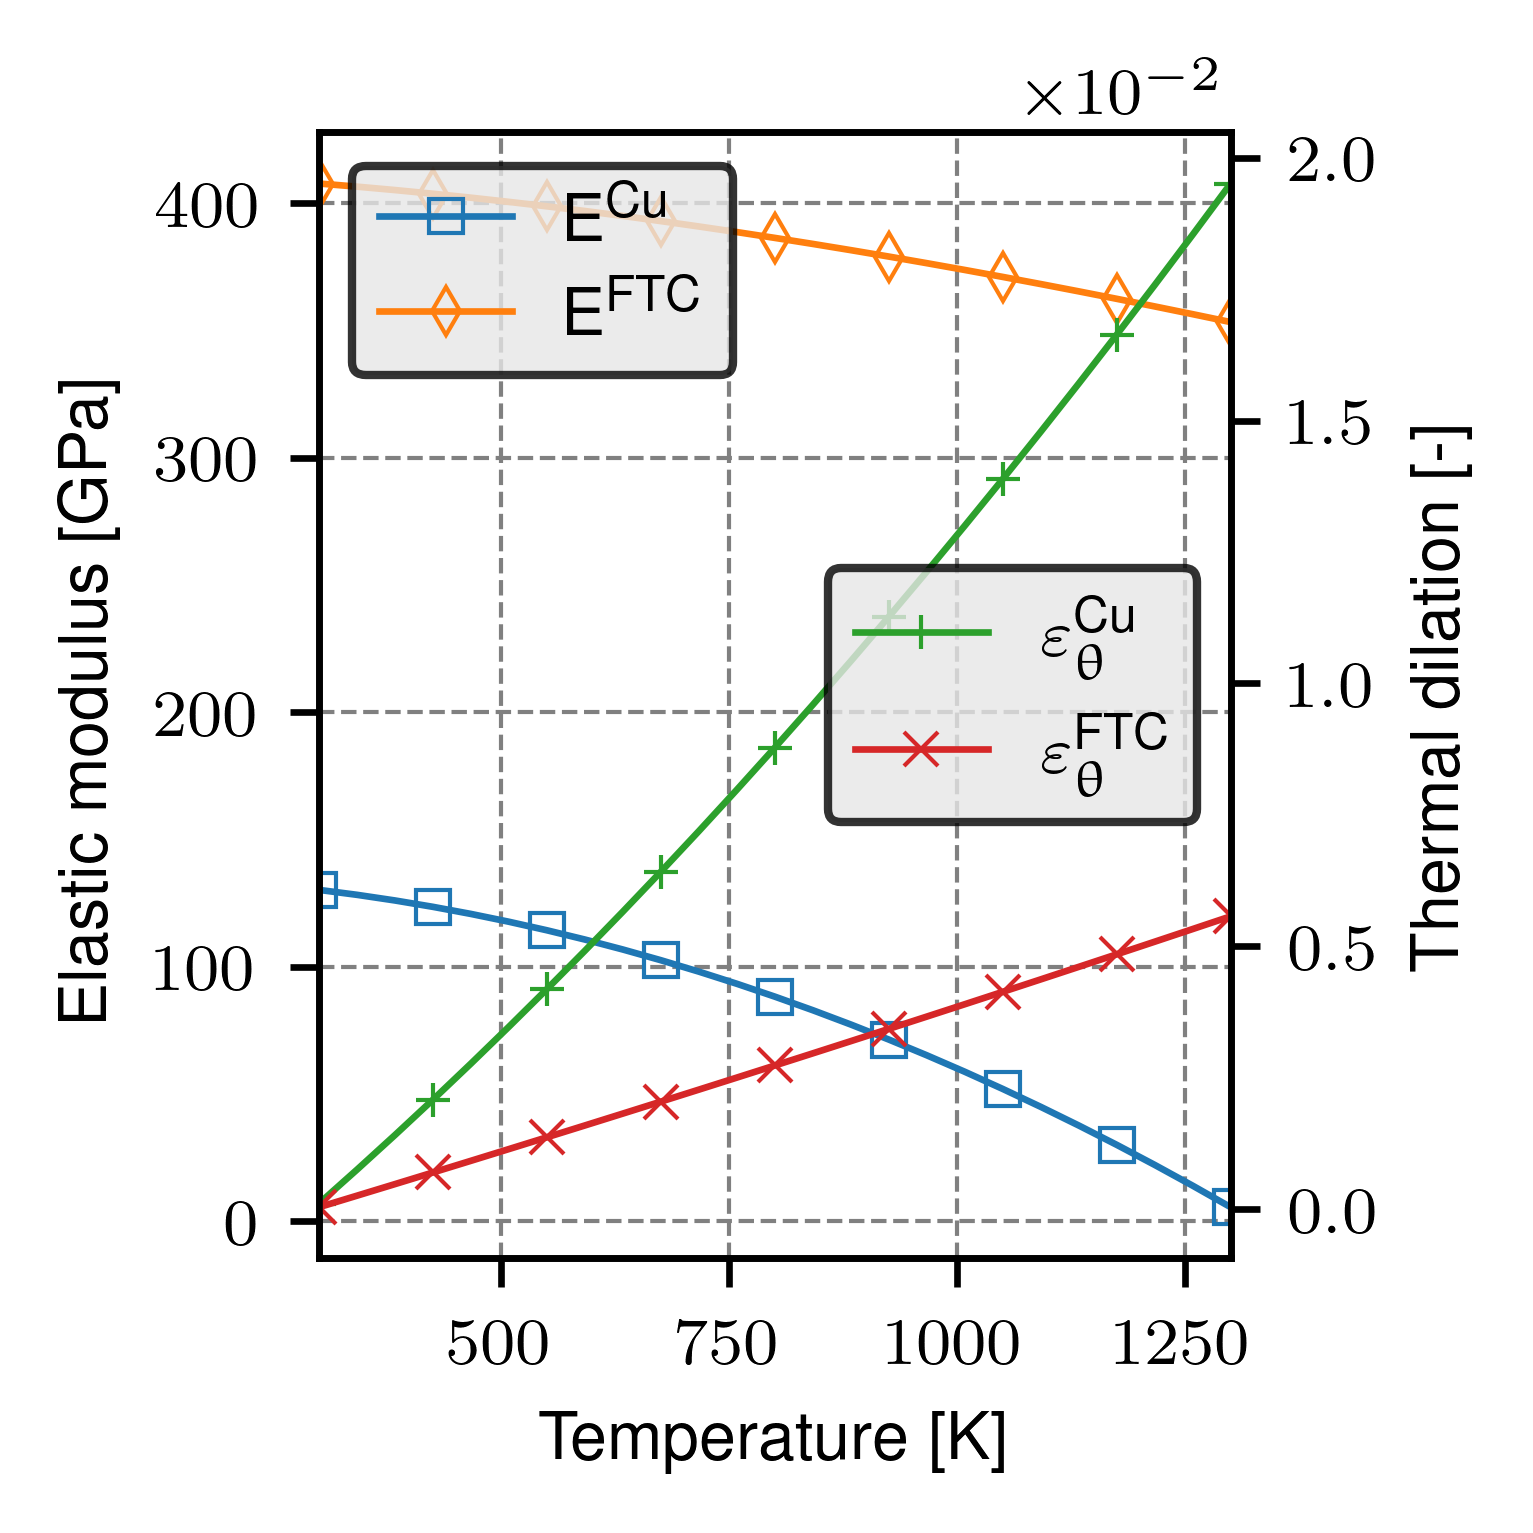

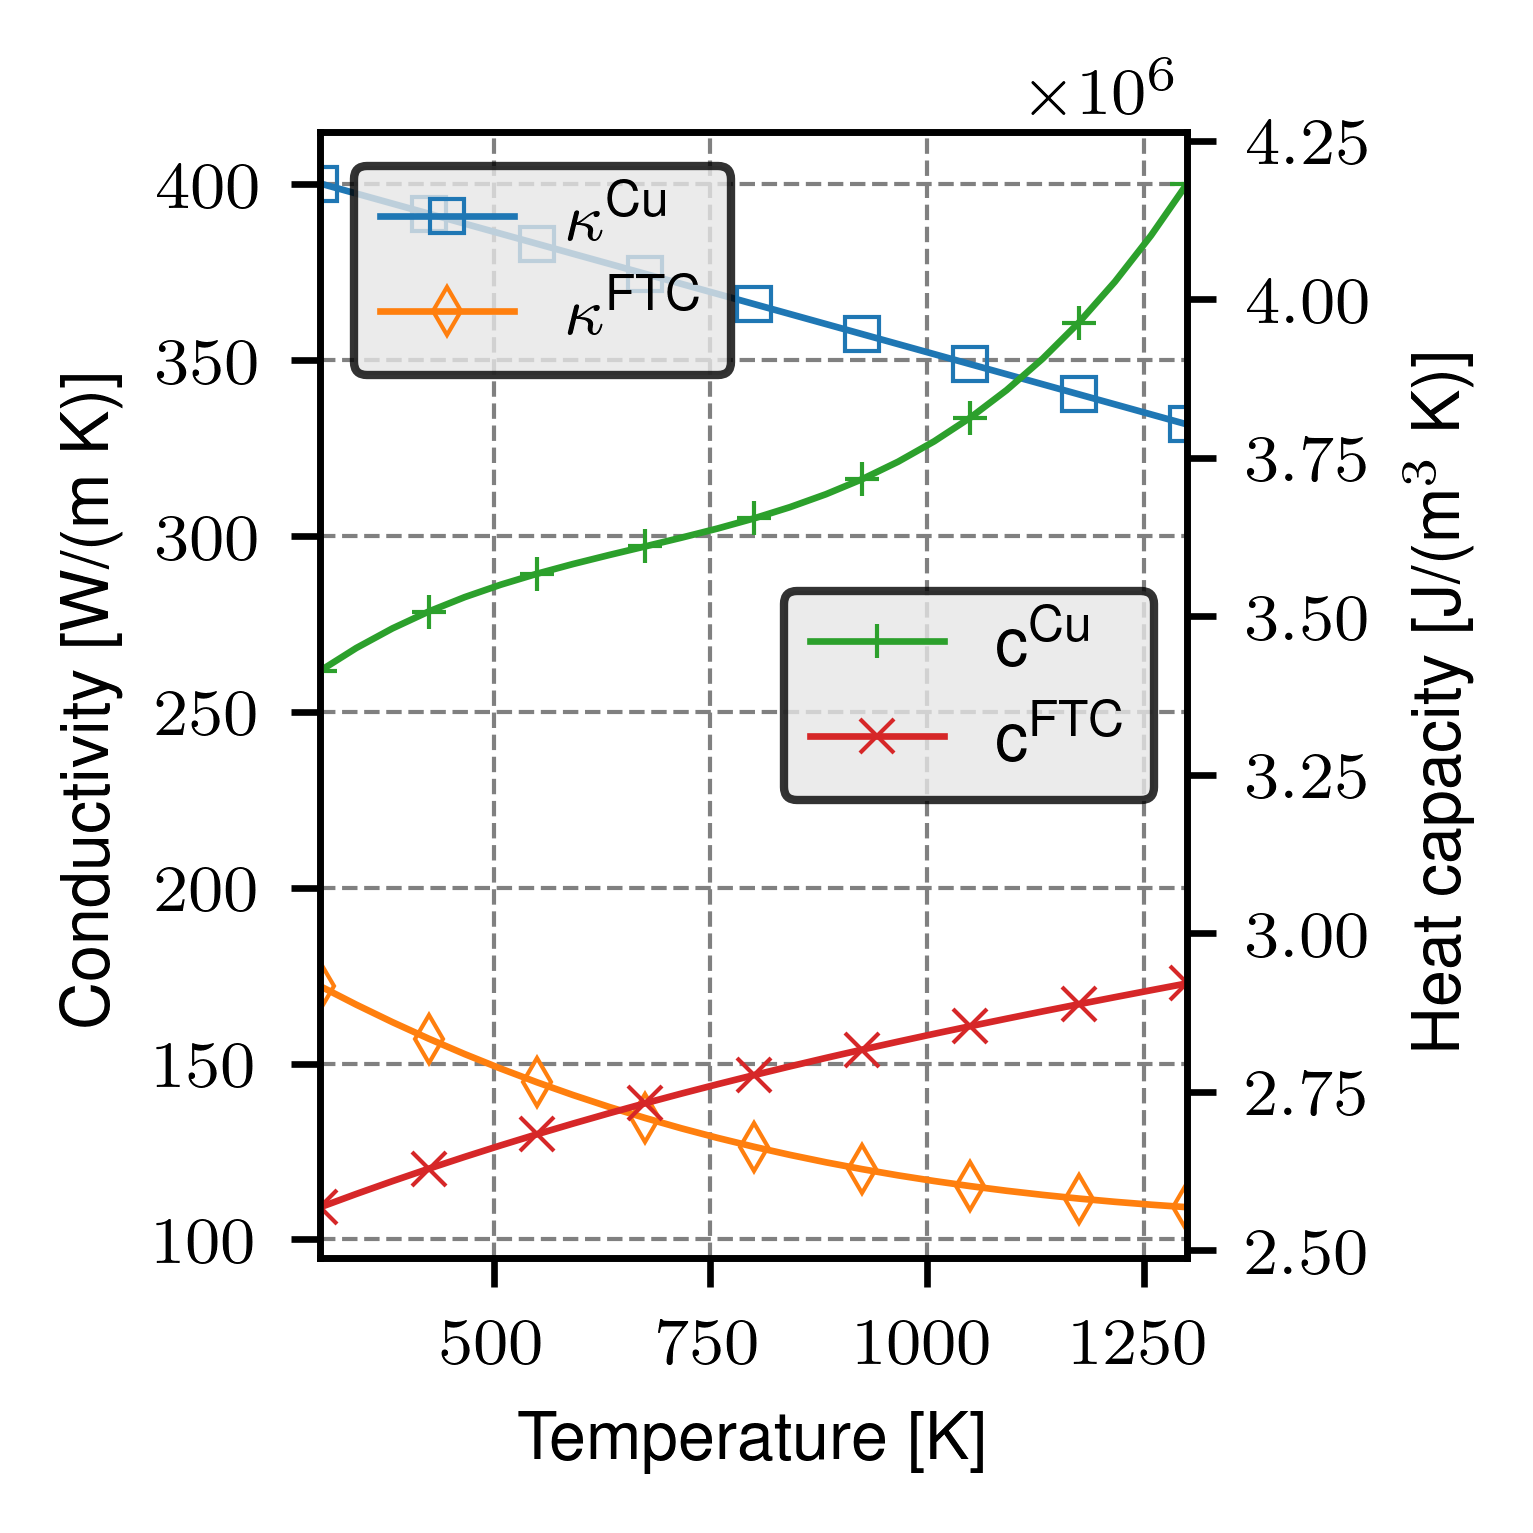

In [6]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import os

    preamble = r"\usepackage{amsmath} \usepackage{amsfonts} \usepackage{upgreek} \usepackage{helvet}"
    plt.rcParams.update(
        {
            "font.size": 8,
            "lines.linewidth": 0.8,
            "lines.markersize": 4,
            "markers.fillstyle": "none",
            "lines.markeredgewidth": 0.5,
            "text.usetex": True,
            "text.latex.preamble": preamble
            # \usepackage{sansmath} \sansmath
        }
    )

    cm = 1 / 2.54  # centimeters in inches
    data_path = "../data/"

    temp1 = 300
    temp2 = 1300
    n_tests = 25
    test_temperatures = np.linspace(temp1, temp2, num=n_tests)

    temp = temp1
    print(
        f"phase contrast at {temp:6}K: {elastic_modulus_wsc(temp) / elastic_modulus_cu(temp):.2f}"
    )
    temp = temp2
    print(
        f"phase contrast at {temp:6}K: {elastic_modulus_wsc(temp) / elastic_modulus_cu(temp):.2f}"
    )

    parameters = np.zeros((n_tests, 8))
    for idx, temperature in enumerate(test_temperatures):
        # print(f'{temperature = :.2f}')

        parameters[idx, 0] = elastic_modulus_cu(temperature) / 1e6
        parameters[idx, 1] = elastic_modulus_wsc(temperature) / 1e6

        parameters[idx, 2] = eps_th_cu(temperature)
        parameters[idx, 3] = eps_th_wsc(temperature)

        parameters[idx, 4] = conductivity_cu(temperature) / 1e3
        parameters[idx, 5] = conductivity_wsc(temperature) / 1e3

        parameters[idx, 6] = heat_capacity_cu(temperature) * 1e3
        parameters[idx, 7] = heat_capacity_wsc(temperature) * 1e3

    labels = [
        r"E\textsuperscript{Cu}",
        r"E\textsuperscript{FTC}",
        r"${\varepsilon}_{\uptheta}^{\text{Cu}}$",
        r"${\varepsilon}_{\uptheta}^{\text{FTC}}$",
        r"$\kappa$\textsuperscript{Cu}",
        r"$\kappa$\textsuperscript{FTC}",
        r"c\textsuperscript{Cu}",
        r"c\textsuperscript{FTC}",
    ]
    markers = ["s", "d", "+", "x", "o"]
    colors = ["C0", "C1", "C2", "C3", "C4"]

    fig_name = "mat_parameters1"
    xlabel = "Temperature [K]"
    ylabel = "Elastic modulus [GPa]"
    plt.figure(figsize=(6 * cm, 6 * cm), dpi=600)
    plt.plot(
        test_temperatures,
        parameters[:, 0],
        label=labels[0],
        marker=markers[0],
        color=colors[0],
        markevery=3,
    )
    plt.plot(
        test_temperatures,
        parameters[:, 1],
        label=labels[1],
        marker=markers[1],
        color=colors[1],
        markevery=3,
    )
    gca1 = plt.gca()
    gca2 = gca1.twinx()
    gca2.plot(
        test_temperatures,
        parameters[:, 2],
        label=labels[2],
        marker=markers[2],
        color=colors[2],
        markevery=3,
    )
    gca2.plot(
        test_temperatures,
        parameters[:, 3],
        label=labels[3],
        marker=markers[3],
        color=colors[3],
        markevery=3,
    )
    gca1.set_xlim([temp1, temp2])
    gca1.set_xlabel(rf"{xlabel}")
    gca1.set_ylabel(rf"{ylabel}")
    gca1.grid(ls="--", color="gray", linewidth=0.5)
    ylabel = "Thermal dilation [-]"
    gca2.set_ylabel(rf"{ylabel}")
    gca2.ticklabel_format(axis="y", scilimits=[0, 2])
    gca1.legend(loc="upper left", facecolor=(0.9, 0.9, 0.9, 0.6), edgecolor="black")
    gca2.legend(loc="center right", facecolor=(0.9, 0.9, 0.9, 0.6), edgecolor="black")
    plt.tight_layout(pad=0.025)
    plt.savefig(os.path.join(data_path, "results", f"{fig_name}.pdf"))
    plt.show()

    fig_name = "mat_parameters2"
    xlabel = "Temperature [K]"
    ylabel = "Conductivity [W/(m K)]"
    plt.figure(figsize=(6 * cm, 6 * cm), dpi=600)
    plt.plot(
        test_temperatures,
        parameters[:, 0 + 4],
        label=labels[0 + 4],
        marker=markers[0],
        color=colors[0],
        markevery=3,
    )
    plt.plot(
        test_temperatures,
        parameters[:, 1 + 4],
        label=labels[1 + 4],
        marker=markers[1],
        color=colors[1],
        markevery=3,
    )
    gca1 = plt.gca()
    gca2 = gca1.twinx()
    gca2.plot(
        test_temperatures,
        parameters[:, 2 + 4],
        label=labels[2 + 4],
        marker=markers[2],
        color=colors[2],
        markevery=3,
    )
    gca2.plot(
        test_temperatures,
        parameters[:, 3 + 4],
        label=labels[3 + 4],
        marker=markers[3],
        color=colors[3],
        markevery=3,
    )
    gca1.set_xlim([temp1, temp2])
    gca1.set_xlabel(rf"{xlabel}")
    gca1.set_ylabel(rf"{ylabel}")
    gca1.grid(ls="--", color="gray", linewidth=0.5)
    ylabel = r"Heat capacity [J/(m$^3$ K)]"
    gca2.set_ylabel(rf"{ylabel}")
    gca1.legend(loc="upper left", facecolor=(0.9, 0.9, 0.9, 0.6), edgecolor="black")
    gca2.legend(loc="center right", facecolor=(0.9, 0.9, 0.9, 0.6), edgecolor="black")
    plt.tight_layout(pad=0.025)
    plt.savefig(os.path.join(data_path, "results", f"{fig_name}.pdf"))
    plt.show()

## Yield stress function of the plastic phase of the material

In [7]:
def my_sig_y(
    theta: float, q: float, derivative=False
) -> Union[float, Tuple[float, float]]:
    """
    Defines the yield stress function of the plastic phase of the material

    :param theta: temperature
    :type theta: float
    :param q: hardening
    :type q: float
    :param derivative: if the derivative should also be returned
    :type derivative: bool
    :return: yield stress or (yield stress, derivative of yield stress)
    :rtype: Union[float, Tuple[float, float]]
    """
    if theta < 966.06:
        sig0 = (
            1.12133e02 * theta
            + 3.49810e04
            + 1.53393e05 * np.tanh((635.754 - theta) / 206.958)
        )
    else:
        sig0 = 2023.286
    H = 5e5  # equivalent to 500 MPa
    if derivative is False:
        return sig0 + H * q
    else:
        return sig0 + H * q, H

## Plot sig0 over the temperature range

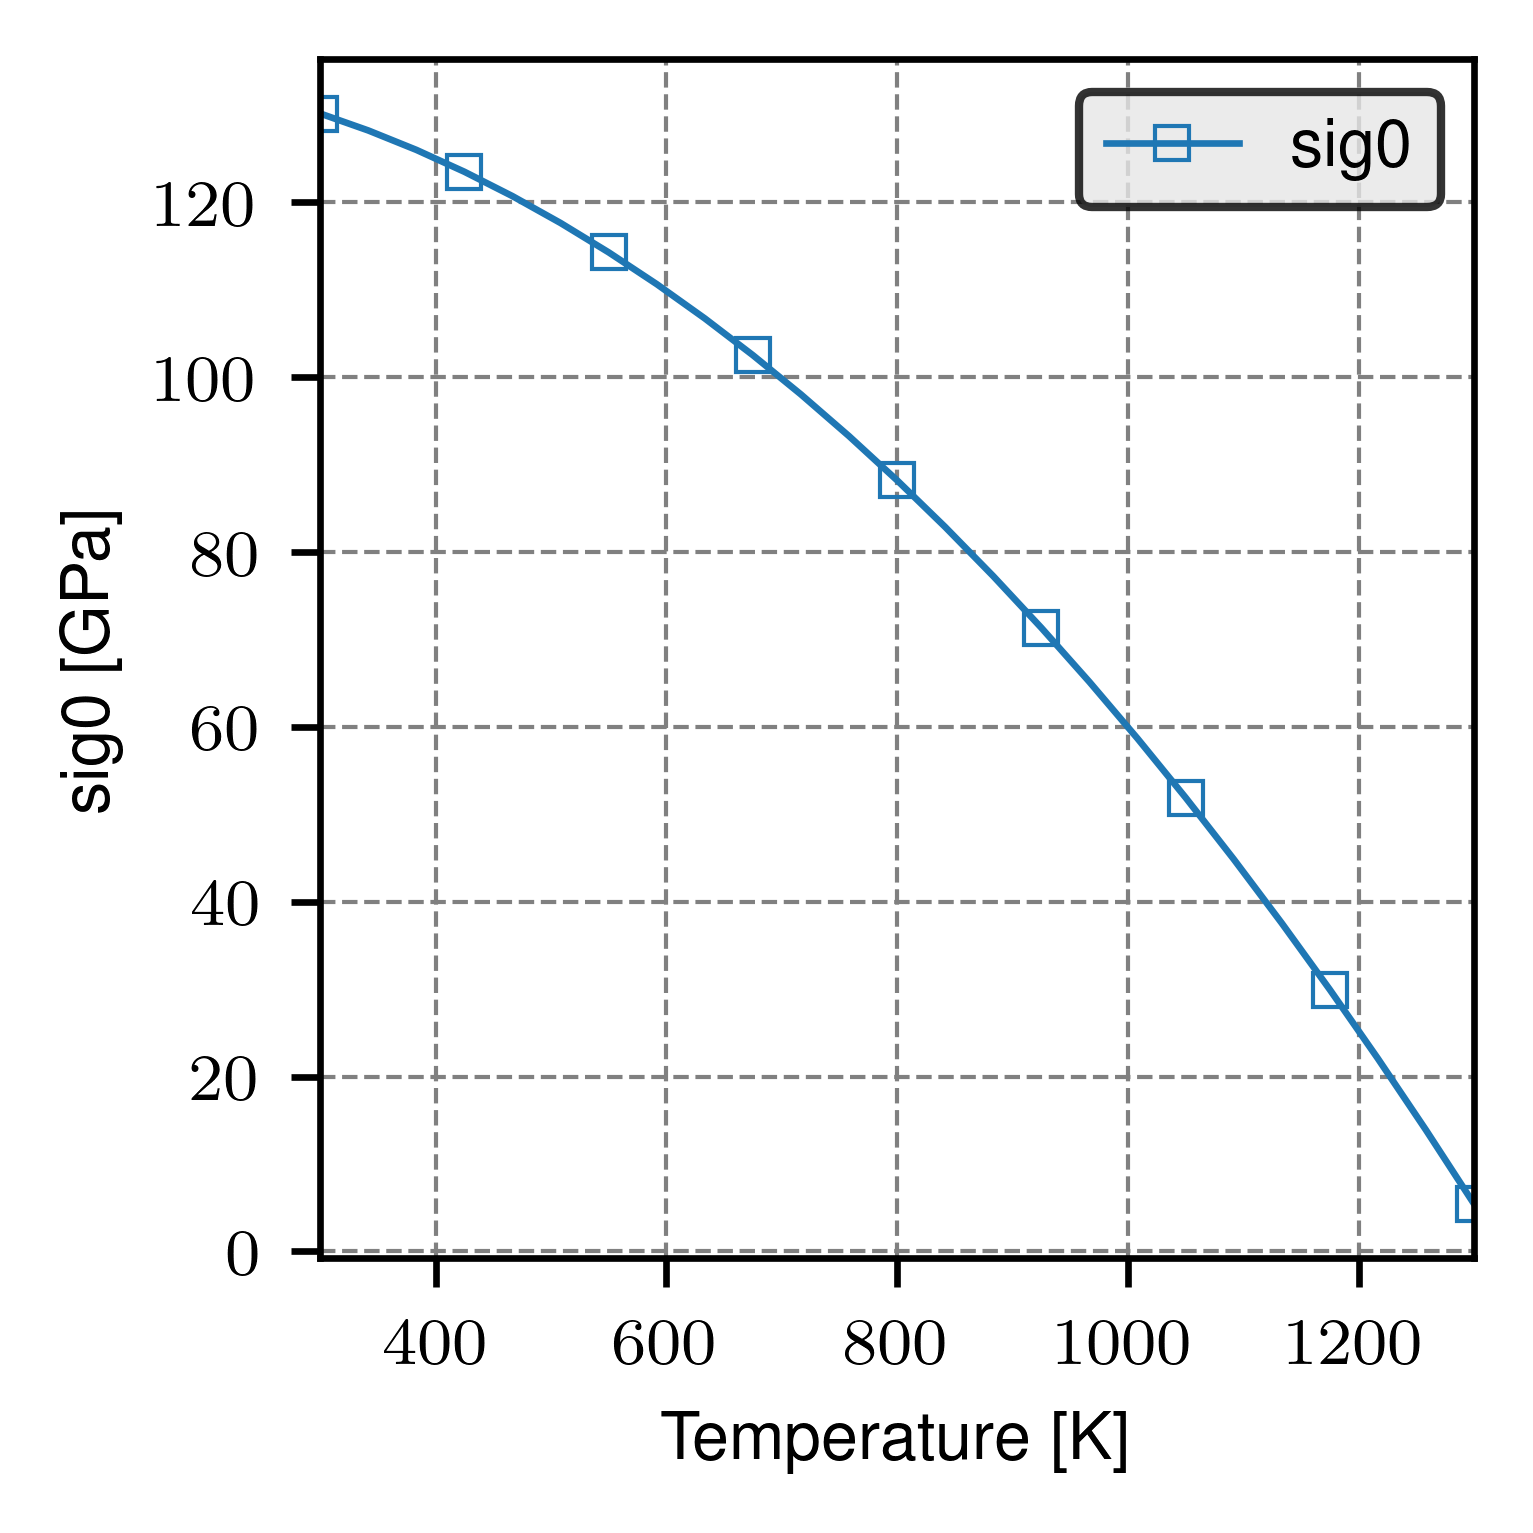

In [8]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import os

    plt.rcParams.update(
        {
            "font.size": 8,
            "lines.linewidth": 0.8,
            "lines.markersize": 4,
            "markers.fillstyle": "none",
            "lines.markeredgewidth": 0.5,
            "text.usetex": True,
            "text.latex.preamble": preamble
            # \usepackage{sansmath} \sansmath
        }
    )

    cm = 1 / 2.54  # centimeters in inches
    data_path = "../data/"

    temp1 = 300
    temp2 = 1300
    n_tests = 25
    test_temperatures = np.linspace(temp1, temp2, num=n_tests)

    parameters = np.zeros((n_tests, 1))
    for idx, temperature in enumerate(test_temperatures):
        parameters[idx, 0] = elastic_modulus_cu(temperature) / 1e6

    labels = [r"sig0"]
    markers = ["s", "d", "+", "x", "o"]
    colors = ["C0", "C1", "C2", "C3", "C4"]

    fig_name = "sig0_parameter"
    xlabel = "Temperature [K]"
    ylabel = "sig0 [GPa]"
    plt.figure(figsize=(6 * cm, 6 * cm), dpi=600)
    plt.plot(
        test_temperatures,
        parameters[:, 0],
        label=labels[0],
        marker=markers[0],
        color=colors[0],
        markevery=3,
    )
    gca1 = plt.gca()
    gca1.set_xlim([temp1, temp2])
    gca1.set_xlabel(rf"{xlabel}")
    gca1.set_ylabel(rf"{ylabel}")
    gca1.grid(ls="--", color="gray", linewidth=0.5)
    gca1.legend(loc="upper right", facecolor=(0.9, 0.9, 0.9, 0.6), edgecolor="black")
    plt.tight_layout(pad=0.025)
    plt.savefig(os.path.join(data_path, "results", f"{fig_name}.pdf"))
    plt.show()